In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import os

# Reading in the file required for analysis.
vic_subs_path = "Desktop/vic_wages.csv"
vic_subs_df = pd.read_csv(vic_subs_path)

vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,2018-19,2009-19,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-19,2009-19,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [29]:
vic_subs_df.columns = vic_subs_df.iloc[0]
vic_subs_df = vic_subs_df.drop(vic_subs_df.index[[0,1]])
vic_subs_df = vic_subs_df.reset_index(drop=True)
vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020"})


vic_subs_df

,Suburb,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2018-19,2009-19,Growth PA
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000,13,91,6.7
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000,-7,73,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [30]:
vic_subs_df = vic_subs_df.iloc[:,0:16]

vic_subs_df = vic_subs_df.replace("-", np.nan)

clean_subs_df = vic_subs_df.dropna(how='any').copy()

clean_subs_df["2009"] = clean_subs_df["2009"].astype(float)
clean_subs_df["2010"] = clean_subs_df["2010"].astype(float)
clean_subs_df["2011"] = clean_subs_df["2011"].astype(float)
clean_subs_df["2012"] = clean_subs_df["2012"].astype(float)
clean_subs_df["2013"] = clean_subs_df["2013"].astype(float)
clean_subs_df["2014"] = clean_subs_df["2014"].astype(float)
clean_subs_df["2015"] = clean_subs_df["2015"].astype(float)
clean_subs_df["2016"] = clean_subs_df["2016"].astype(float)
clean_subs_df["2017"] = clean_subs_df["2017"].astype(float)
clean_subs_df["2018"] = clean_subs_df["2018"].astype(float)
clean_subs_df["2019"] = clean_subs_df["2019"].astype(float)
clean_subs_df["2020"] = clean_subs_df["2020"].astype(float)
clean_subs_df["2018-19"] = clean_subs_df["2018-19"].astype(float)
clean_subs_df["2009-19"] = clean_subs_df["2009-19"].astype(float)

In [31]:
del clean_subs_df["2009"]
del clean_subs_df["2010"]
del clean_subs_df["2011"]
del clean_subs_df["2012"]
del clean_subs_df["2013"]
del clean_subs_df["2014"]
del clean_subs_df["2015"]
del clean_subs_df["2016"]
del clean_subs_df["2017"]

In [33]:
clean_subs_df = clean_subs_df.sort_values("2018-19", ascending=False)
clean_subs_df

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
217,DERRINALLUM,122500.0,221500.0,158500.0,81.0,55.0,4.5
790,WYE RIVER,870000.0,1300000.0,1042500.0,49.0,105.0,7.4
735,WAHGUNYAH,240000.0,355000.0,395000.0,48.0,87.0,6.5
187,CORRYONG,162500.0,236000.0,200000.0,45.0,66.0,5.2
476,MINYIP,81000.0,114500.0,95000.0,41.0,32.0,2.8
...,...,...,...,...,...,...,...
582,PORTLAND NORTH,367500.0,276000.0,541000.0,-25.0,23.0,2.1
276,FLOWERDALE,390000.0,290000.0,420000.0,-26.0,24.0,2.1
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5


In [34]:
top_five=clean_subs_df.head()
top_five

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
217,DERRINALLUM,122500.0,221500.0,158500.0,81.0,55.0,4.5
790,WYE RIVER,870000.0,1300000.0,1042500.0,49.0,105.0,7.4
735,WAHGUNYAH,240000.0,355000.0,395000.0,48.0,87.0,6.5
187,CORRYONG,162500.0,236000.0,200000.0,45.0,66.0,5.2
476,MINYIP,81000.0,114500.0,95000.0,41.0,32.0,2.8


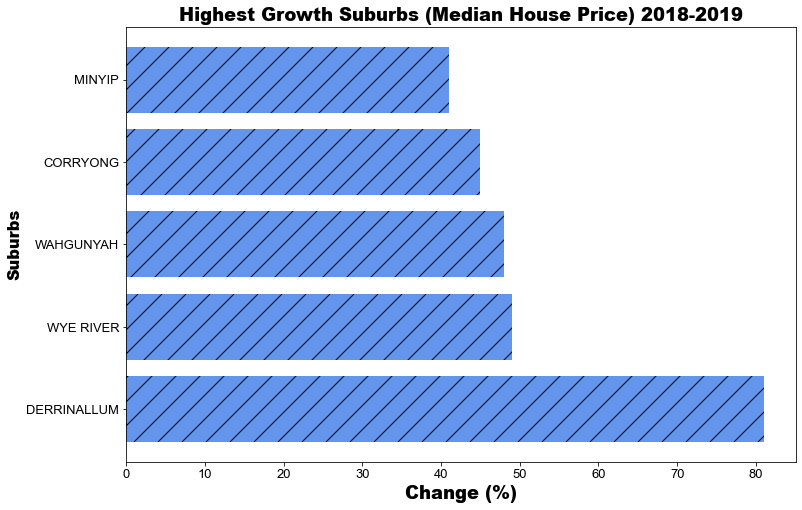

In [42]:
plt.figure(figsize=(12,8)) 

y_axis = top_five["2018-19"]
x_axis = top_five["Suburb"]
x_data = np.arange(0, len(x_axis))
tick_locations = []
for x in x_data:
    tick_locations.append(x)
plt.barh(x_data, y_axis, alpha=1, align='center', color='cornflowerblue', hatch='/')
plt.yticks(tick_locations, x_axis,  rotation='horizontal')
plt.title("Highest Growth Suburbs (Median House Price) 2018-2019", font='Arial Black', fontsize=18)
plt.xlabel("Change (%)", font='Arial Black', fontsize=18)
plt.ylabel("Suburbs",  font='Arial Black', fontsize=16)
plt.xticks(rotation=0, font='Arial', fontsize=13)
plt.yticks(rotation=0, font='Arial', fontsize=13)
print("")

In [43]:
bottom_five=clean_subs_df.tail()
bottom_five

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
582,PORTLAND NORTH,367500.0,276000.0,541000.0,-25.0,23.0,2.1
276,FLOWERDALE,390000.0,290000.0,420000.0,-26.0,24.0,2.1
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
560,PARKVILLE,2430000.0,1480000.0,1657500.0,-39.0,14.0,1.3


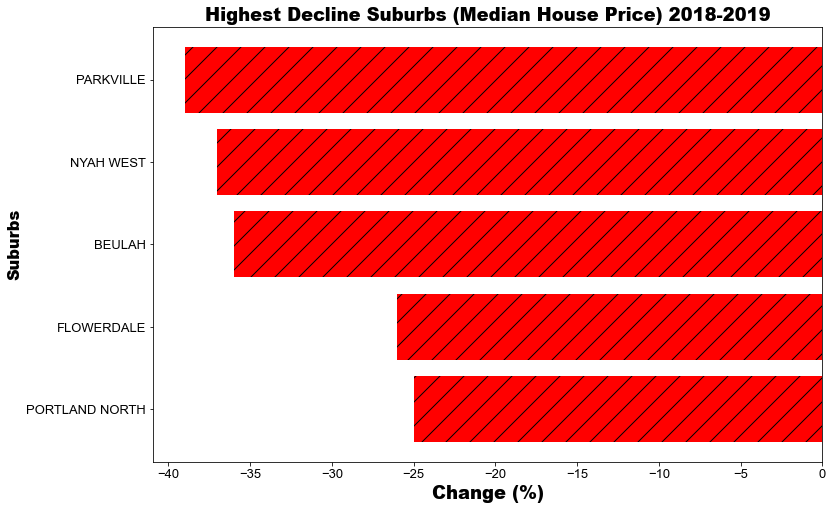

In [50]:
plt.figure(figsize=(12,8)) 

y_axis = bottom_five["2018-19"]
x_axis = bottom_five["Suburb"]
x_data = np.arange(0, len(x_axis))
tick_locations = []
for x in x_data:
    tick_locations.append(x)
plt.barh(x_data, y_axis, alpha=1, align='center', color='red', hatch='/')
plt.yticks(tick_locations, x_axis,  rotation='horizontal')
plt.title("Highest Decline Suburbs (Median House Price) 2018-2019", font='Arial Black', fontsize=18)
plt.xlabel("Change (%)", font='Arial Black', fontsize=18)
plt.ylabel("Suburbs",  font='Arial Black', fontsize=16)
plt.xticks(rotation=0, font='Arial', fontsize=13)
plt.yticks(rotation=0, font='Arial', fontsize=13)
print("")

In [51]:
clean_subs_df = clean_subs_df.sort_values("2009-19", ascending=False)
clean_subs_df

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
646,SMYTHESDALE,290000.0,340000.0,121000.0,17.0,167.0,10.3
722,TRENTHAM,603000.0,614000.0,632500.0,2.0,159.0,10
274,FLINDERS,1697500.0,1670000.0,1300000.0,-2.0,155.0,9.8
183,COONGULLA,242000.0,335000.0,310000.0,38.0,139.0,9.1
573,POOWONG,315000.0,443000.0,285000.0,41.0,138.0,9
...,...,...,...,...,...,...,...
155,CHILTERN,260000.0,223500.0,265000.0,-14.0,-2.0,-0.2
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
555,OUYEN,93000.0,99000.0,114000.0,6.0,-10.0,-1


In [52]:
top_five_dec = clean_subs_df.head()
top_five_dec

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
646,SMYTHESDALE,290000.0,340000.0,121000.0,17.0,167.0,10.3
722,TRENTHAM,603000.0,614000.0,632500.0,2.0,159.0,10
274,FLINDERS,1697500.0,1670000.0,1300000.0,-2.0,155.0,9.8
183,COONGULLA,242000.0,335000.0,310000.0,38.0,139.0,9.1
573,POOWONG,315000.0,443000.0,285000.0,41.0,138.0,9


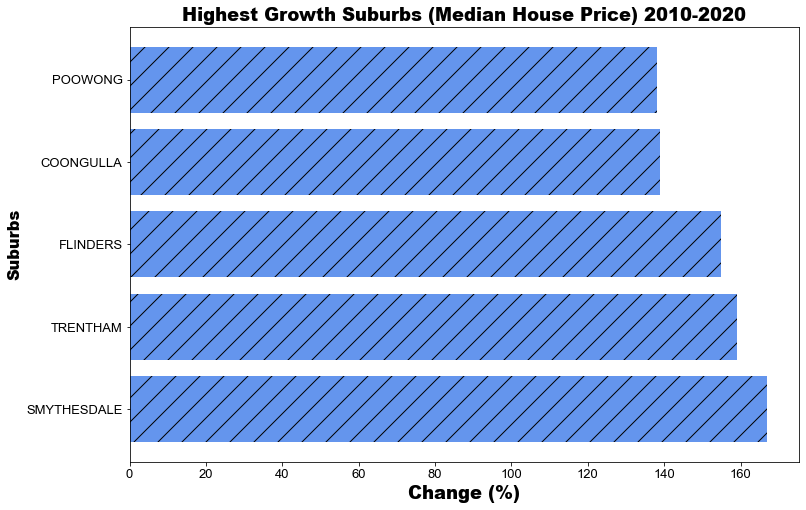

In [58]:
plt.figure(figsize=(12,8)) 

y_axis = top_five_dec["2009-19"]
x_axis = top_five_dec["Suburb"]
x_data = np.arange(0, len(x_axis))
tick_locations = []
for x in x_data:
    tick_locations.append(x)
plt.barh(x_data, y_axis, alpha=1, align='center', color='cornflowerblue', hatch='/')
plt.yticks(tick_locations, x_axis,  rotation='horizontal')
plt.title("Highest Growth Suburbs (Median House Price) 2010-2020", font='Arial Black', fontsize=18)
plt.xlabel("Change (%)", font='Arial Black', fontsize=18)
plt.ylabel("Suburbs",  font='Arial Black', fontsize=16)
plt.xticks(rotation=0, font='Arial', fontsize=13)
plt.yticks(rotation=0, font='Arial', fontsize=13)
print("")

In [59]:
top_five_dec = clean_subs_df.tail()
top_five_dec

,Suburb,2018,2019,2020,2018-19,2009-19,Growth PA
155,CHILTERN,260000.0,223500.0,265000.0,-14.0,-2.0,-0.2
72,BEULAH,120500.0,77000.0,81000.0,-36.0,-4.0,-0.4
542,NYAH WEST,135000.0,85000.0,110000.0,-37.0,-4.0,-0.5
555,OUYEN,93000.0,99000.0,114000.0,6.0,-10.0,-1
338,HOPETOUN,86000.0,66000.0,142500.0,-23.0,-10.0,-1.1


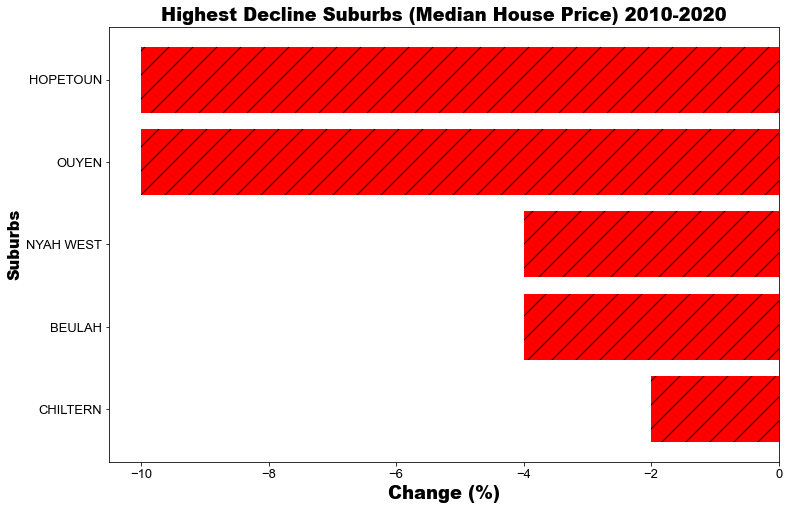

In [63]:
plt.figure(figsize=(12,8)) 

y_axis = top_five_dec["2009-19"]
x_axis = top_five_dec["Suburb"]
x_data = np.arange(0, len(x_axis))
tick_locations = []
for x in x_data:
    tick_locations.append(x)
plt.barh(x_data, y_axis, alpha=1, align='center', color='red', hatch='/')
plt.yticks(tick_locations, x_axis,  rotation='horizontal')
plt.title("Highest Decline Suburbs (Median House Price) 2010-2020", font='Arial Black', fontsize=18)
plt.xlabel("Change (%)", font='Arial Black', fontsize=18)
plt.ylabel("Suburbs",  font='Arial Black', fontsize=16)
plt.xticks(rotation=0, font='Arial', fontsize=13)
plt.yticks(rotation=0, font='Arial', fontsize=13)
print("")